cwyang, 19 Mar 2017

from http://cs231n.github.io/neural-networks-case-study/
### Initialization

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
xrange=range

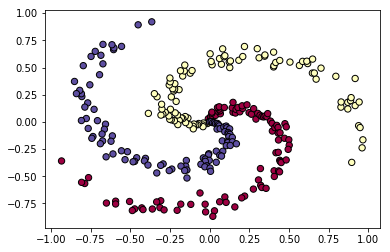

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
num_examples = X.shape[0]
reg = 0.1
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolor='black')
plt.show()

### Softmax Linear Classifier


<center> $L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right)\\L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \frac{1}{2} \lambda \sum_k\sum_l W_{k,l}^2 }_\text{regularization loss}$ </center>

In [3]:
# random parameter initialization
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1,K))

# X~(NK,D) W~(D,K). each score for (blue, red, yellow)
scores = np.dot (X, W) + b  

exp_scores = np.exp(scores) #unnormalized
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
correct_loss = -np.log(probs[range(num_examples),y])

# compute the loss: average cross-entropy loss & regularization
data_loss = np.sum(correct_loss) / num_examples
reg_loss = 0.5 * reg * np.sum(W*W) # * is elementwise
loss = data_loss + reg_loss

# initial loss should be 1.1 ~ np.log(1.0 / 3)

### Analytic Gradient with Backpropagation

<center>
$p_k = \frac{e^{f_k}}{ \sum_j e^{f_j} } \hspace{1in} L_i =-\log\left(p_{y_i}\right)\\$
</center>
<center>
$\frac{\partial L_i }{ \partial f_k } = p_k - \mathbb{1}(y_i = k)$
</center>


$\frac{\partial L_i}{\partial f_k} \\
= 
\frac{\partial p_k}{\partial f_k}
\frac{\partial L_i}{\partial p_k} \\
= p_k (1-p_k) \frac{\partial L_i}{\partial p_k} \\
= p_k (p_k-1) \frac{1}{p_{yi}} \frac{\partial p_{yi}}{\partial p_k} \\
...
$

$ = p_k - 1(y_i = k) $

In [4]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples
# divide dscores with num_examples 
# to avoid divide each dW and db with num examples

# backprogate into W and b
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W

# parameter update
# W += -step_size * dW
# b += -step_size * db

### Putting together

In [82]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.099620
iteration 10: loss 0.910964
iteration 20: loss 0.841511
iteration 30: loss 0.810195
iteration 40: loss 0.793999
iteration 50: loss 0.784829
iteration 60: loss 0.779304
iteration 70: loss 0.775822
iteration 80: loss 0.773554
iteration 90: loss 0.772037
iteration 100: loss 0.771004
iteration 110: loss 0.770288
iteration 120: loss 0.769786
iteration 130: loss 0.769430
iteration 140: loss 0.769176
iteration 150: loss 0.768993
iteration 160: loss 0.768861
iteration 170: loss 0.768765
iteration 180: loss 0.768695
iteration 190: loss 0.768643


### accuracy

In [78]:
scores = np.dot(X, W) + b
yy = np.argmax(scores, axis=1)
print('traning accuracy: %.2f' % np.mean(yy == y))
print(W)

traning accuracy: 0.52
[[ 0.26683442  0.33132712 -0.59816154]
 [-0.57461732  0.65218934 -0.07757201]]


### graph

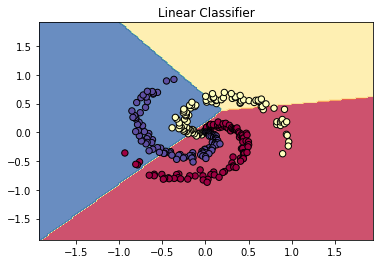

In [81]:
# plot the resulting classifier
def showBoundary(X,y,W,b,title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolor='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title);
    plt.show()

    #fig.savefig('spiral_linear.png')
showBoundary(X,y,W,b,"Linear Classifier")

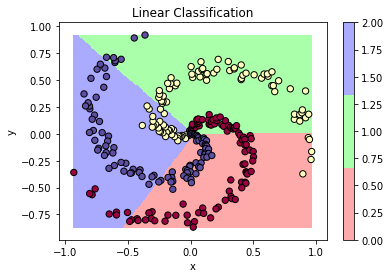

In [59]:
# another approach
def showBoundary2(X,y,W,b,title):
    #Plot data set 
    #labels=['sr','og','^b']
    #for i in [0,1,2]:
    #  plt.plot(X[y==i,0],X[y==i,1],labels[i-1], markeredgecolor='black');
    
    #Prepare grid for plotting decision surface
    gx1, gx2 = np.meshgrid(np.arange(min(X[:,0]), max(X[:,0]),(max(X[:,0])-min(X[:,0]))/200.0 ),
                             np.arange(min(X[:,1]), max(X[:,1]),(max(X[:,1])-min(X[:,1]))/200.0))
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx   = np.vstack((gx1l,gx2l)).T
    #Compute a prediction for every point in the grid
    Z = np.dot(gx,W) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(gx1.shape)
    # Draw boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.pcolormesh(gx1,gx2,Z,cmap=cmap_light)
    plt.colorbar();

    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolor='black')

    plt.xlabel('x');
    plt.ylabel('y');   
    plt.axis('tight');
    plt.title(title);
    plt.show()
    
showBoundary2(X,y,W,b,"Linear Classification")

---
### Two Layer NN

In [64]:
# initialize parameters randomly
def initParam(D,K):
    h = 100 # size of hidden layer
    W = 0.01 * np.random.randn(D, h)
    b = np.zeros((1,h))
    W2 = 0.01 * np.random.randn(h,K)
    b2 = np.zeros((1,K))
    return (h,W,b,W2,b2)

h,W,b,W2,b2 = initParam(1,1)

### changes

In [ ]:
# forward pass
hidden_layer = np.maximum(0, np.dot(X, W) + b) # ReLU activation, non-linearity
scores = np.dot(hidden_layer, W2) + b

# backpropagation is also two-pass
# first backprop into W2 and b2
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis = 0, keepdims = True)

dhidden = np.dot(dscores, W2.T)



In [69]:
a=np.zeros((3,3))
a[range(3),[1,0,0]] = 3
print a

[[ 0.  3.  0.]
 [ 3.  0.  0.]
 [ 3.  0.  0.]]
